In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Creación de dataset:

In [2]:
#Reproductibilidad
np.random.seed(0)

# Generación de parametros y datos independientes
X = np.linspace(0, 5, 100)
a = np.random.uniform(1, 3)
b = np.random.uniform(1, 3)

# Distribución de tipo exponencial con algo de ruido (para simulación de datos reales)
ruido = np.random.normal(0, 10, X.shape)
y = a*b**X
y_ruidoso = a*b**X + ruido

## Visualización

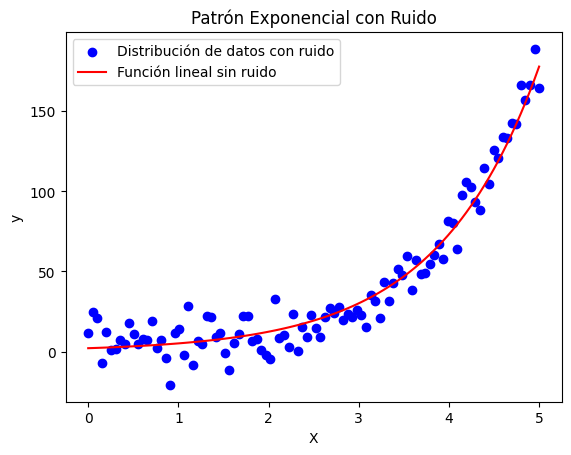

In [3]:
plt.scatter(X, y_ruidoso, label='Distribución de datos con ruido', color='b')
plt.plot(X, y, label='Función lineal sin ruido', color='r')
plt.title("Patrón Exponencial con Ruido")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Preprocessing

In [4]:
# Parametros de la linealización
log_a = np.log(a)
log_b = np.log(b)
log_y = np.log(y)

In [5]:
# Función linealizada
log_y = log_a + log_b*X

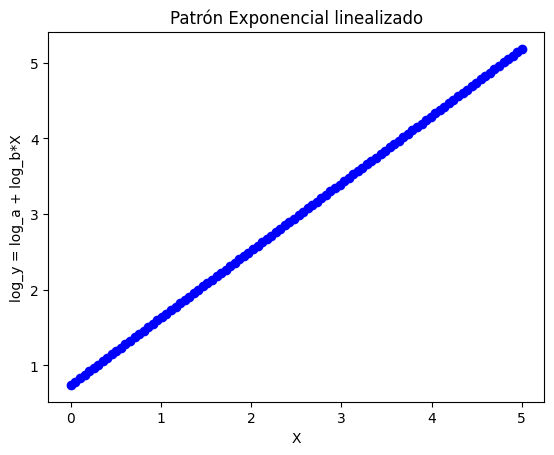

In [6]:
plt.scatter(X, log_y, color='b')
plt.title("Patrón Exponencial linealizado")
plt.xlabel("X")
plt.ylabel("log_y = log_a + log_b*X")
plt.show()

## Entrenamiento

In [7]:
model = linear_model.LinearRegression()
X = X.reshape(-1,1)
result = model.fit(X, log_y)

In [11]:
# Coeficiente de regresión según la ecuación de linealización:
b_result = np.exp(result.coef_[0])
print(f"""Coef. linealizado :    {b_result}
Coef. sin linealizar : {b}""")

Coef. linealizado :    2.430378732744839
Coef. sin linealizar : 2.430378732744839


In [9]:
# Intercept de regresión sin linealizar y linealizado:
a_result = np.exp(result.intercept_)
print(f"""Intercept linealizado :    {a_result}
Intercept sin linealizar : {a}""")

Intercept linealizado :    2.0976270078546486
Intercept sin linealizar : 2.0976270078546495


In [12]:
# Predicción:
predict = model.predict(X)
y_pred = np.exp(predict)

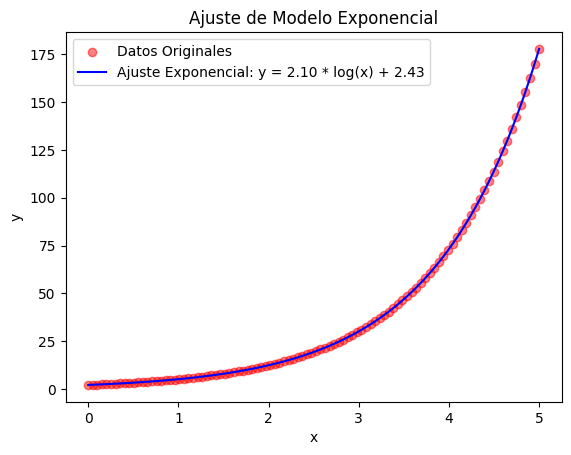

In [15]:
plt.scatter(X, y, label="Datos Originales", color="red", alpha=0.5)
plt.plot(X, y_pred, label=f"Ajuste Exponencial: y = {a_result:.2f} * log(x) + {b_result:.2f}", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Ajuste de Modelo Exponencial")
plt.show()